In [1]:
# 구글드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# 작업 디렉토리 설정
import os
os.chdir('/content/drive/MyDrive/PyStat')

ModuleNotFoundError: No module named 'google'

In [3]:
# 객체 내용/타입 출력
def printobj(*a):
    for x in a:
        display(x)
        print('\n', type(x), '\n')

# 기술 통계

<details><summary>기술 통계(descriptive statistics) : 수집한 데이터를 요약, 묘사, 설명하는 통계 기법
</summary>

- 1변량(1차원) 데이터
  - 통계량 : 대표값(평균값/중앙값/최빈값), 산포도(분산/표준편차/범위)
  - 시각화 : 도수분포표, 히스토그램, 상자그림
- 다변량(다차원) 데이터
  - 통계량 : 1변량 + 두 변량 간 관계(공분산/상관계수)
  - 시각화 : 1변량 + 두 변량 간 관계(산점도/회귀선/히트맵)

## CHAP 3. 2차원 데이터 정리

- 1차원 데이터

- 2차원 데이터

- 데이터의 상관성

- 지표 / 시각화

- 3-1절
  - 지표

- 3-2절
  - 시각확

- 라이브러리 / 데이터

In [4]:
import numpy as np
import pandas as pd

# 소수점 이하 3자리까지 출력
%precision 3
pd.set_option('display.precision', 3)
np.set_printoptions(precision=3, suppress=True)

- ch2_scores_em.csv (영어/수학)

In [5]:
# 작업 디렉토리 아래 data 폴더에 있는 csv 파일을 읽어 들여 DataFrame 자료구조로 저장한다.
df = pd.read_csv('data/ch2_scores_em.csv', index_col='student number')
df.head()  # df의 처음 5행만 출력

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


- 10명

- ndarray / DataFrame

In [6]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

names = ['A','B','C','D','E', 'F','G','H','I','J']

scores_df = pd.DataFrame({'english'     : en_scores,
                          'mathematics' : ma_scores},
                         index=pd.Index(names, name='student'))
printobj(scores_df)

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78



 <class 'pandas.core.frame.DataFrame'> 



### 3-1. 두 데이터 사이의 관계를 나타내는 지표

- **양의 상관**

- **음의 상관**

- **무상관**

- 수치 지표로 표현

#### 1) 공분산

- **산점도**(scatter plot)로 분포 확인

In [7]:
from pystatplot import plot_cov
plot_cov(names, en_scores, ma_scores)
print('[그림 3-1] 점수의 산점도')

ModuleNotFoundError: No module named 'ipywidgets'

- 가운데 가로선과 세로선
  - 수학과 영어 평균 점수

- 양의 상관 예상됨

- **공분산**(covariance)

- 면적으로

In [8]:
plot_cov(names, en_scores, ma_scores, True)
print('[그림 3-2] 점수의 산점도와 부호를 붙인 면적')

NameError: name 'plot_cov' is not defined

- C, E, H 직사각형
  - 가로 : 영어 점수의 편차
  - 세로 : 수학 점수의 편차

- 공분산 : 가로축/세로축 데이터 다름

- 직사각형 / 음의 면적

- 분산
  - 가로축/세로축 데이터 같음
  - 편차가 음이라도
  - 제곱값이므로 항상 양

- 공분산
  - 가로/세로 데이터 다름
  - 한쪽 편차가 양, 다른 한쪽이 음
  - 면적도 음

- 예를 들어
  - E, H : 면적 양
  - C : 면적 음

- 부호 붙인 면적
  - 면적이 양
    - 영어, 수학 모두
      - 평균보다 높거나
      - 평균보다 낮은 경우
        - 상관관계 잘 표현

- 부호 붙인 면적의 평균 $→$ 상관의 지표 $→$ 공분산

- 공분산$\;>\;0\;→\;$ 양의 상관

- 공분산$\;<\;0\;→\;$ 음의 상관

- 공분산$\;≃\;0\;→\;$ 무상관

- DataFrame으로 공분산 계산

In [9]:
summary_df = scores_df.copy()
summary_df['english deviation'] = \
    summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics deviation'] = \
    summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] = \
    summary_df['english deviation'] * summary_df['mathematics deviation']
summary_df

,english,mathematics,english deviation,mathematics deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [10]:
summary_df['product of deviations'].mean()

62.800

- 영어와 수학은 양의 상관관계

- 수식화

$$
\begin{align}
Cov(X,Y)
&= \frac{1}{N}\sum_{i=1}^N{(x_i-μ_X)(y_i-μ_Y)} \\
&= \frac{1}{N}{\{(x_1-μ_X)(y_1-μ_Y)\\
+ (x_2-μ_X)(y_2-μ_Y) \\
+ ⋯ + (x_N-μ_X)(y_N-μ_Y)\}}
\end{align}
\tag{3-1}
$$

- NumPy cov()
  - **공분산 행렬**(covariance matrix) / **분산공분산행렬**(variance-covariance matrix)

In [11]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
printobj(cov_mat)

array([[86.  , 62.8 ],
       [62.8 , 68.44]])


 <class 'numpy.ndarray'> 



  - 1행 2열 (2행 1열) : 공분산
    - cov_mat : [0, 1], [1, 0]

In [12]:
cov_mat[0, 1], cov_mat[1, 0]

(62.800, 62.800)

- [0, 0] : 영어와 영어의 공분산 $=$ 영어의 분산

- [0, 0] : 영어의 분산<br>[1, 1] : 수학의 분산

In [13]:
cov_mat[0, 0], cov_mat[1, 1]

(86.000, 68.440)

- 확인

In [14]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.000, 68.440)

- DataFrame cov()

In [15]:
scores_df.cov(ddof=0)

,english,mathematics
english,86.0,62.80
mathematics,62.8,68.44


#### 2) 상관계수

- 영어와 수학 : (점수 × 점수)<br>키와 수학 : (㎝ × 점수)

- **상관계수**(correlation coefficient)

$$
\begin{align}
ρ_{XY}
&= \frac{Cov(X,Y)}{σ_Xσ_Y} \\\\
&= \frac{1}{N}
   \sum_{i=1}^N{
            \left( \frac{x_i-μ_X}{σ_X} \right)
            \left( \frac{y_i-μ_Y}{σ_X} \right)
               } \\\\
&= \frac{\sum_{i=1}^N{(x_i-μ_X)(y_i-μ_Y)}}
        {\sqrt{\sum_{i=1}^N{(x_i-μ_X)^2}
               \sum_{i=1}^N{(y_i-μ_Y)^2}}}
\end{align}
\tag{3-2}
$$

- $-1 ≤ ρ_{XY} ≤ 1$
  - 양의 상관 $→1$
  - 음의 상관 $→-1$
  - 무상관 $→0$
  - 완전한 직선 $=±1$

- 몇가지 예

In [16]:
from pystatplot import plot_coef
plot_coef()
print('[그림 3-3] 다양한 상관계수에 대한 산점도')

ModuleNotFoundError: No module named 'ipywidgets'

- 영어와 수학 점수의 상관계수

In [17]:
np.cov(en_scores, ma_scores, ddof=0)[0, 1] /\
(np.std(en_scores)*np.std(ma_scores))

0.819

- 강한 양의 상관

- NumPy corrcoef()
  - **상관행렬**(correlation matrix)

In [18]:
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

- [0, 1], [1, 0] : 상관계수

- DataFrame도 corr()

In [19]:
scores_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


### 3-2. 시각화

- 2차원 데이터 시각화 : 산점도

- 회귀직선 / 히트맵

- 임포트

In [20]:
# Matplotlib의 pyplot 모듈을 plt라는 이름을 임포트
import matplotlib.pyplot as plt

# 그래프가 Jupyter Notebook 위에 표시되도록 설정
%matplotlib inline

#### 1) 산점도

- Matplotlib scatter()
  - 첫 번째 인수 : $x$축 데이터
  - 두 번째 인수 : $y$축 데이터

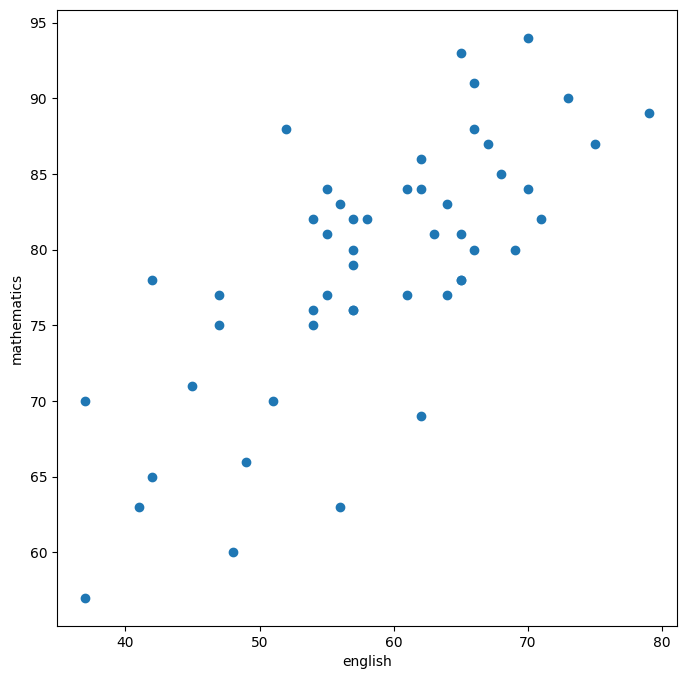

[그림 3-4] 영어와 수학 점수의 산점도


In [21]:
en_scores = np.array(df['english'])
ma_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ax.scatter(en_scores, ma_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()
print('[그림 3-4] 영어와 수학 점수의 산점도')

- 경향성 확인

#### 2) 회귀직선

- 두 데이터 사이의 관계

- NumPy

- np.polyfit() / np.poly1d()
  - $y=β_0+β_1x$

- plot()

- 산점도와 함께

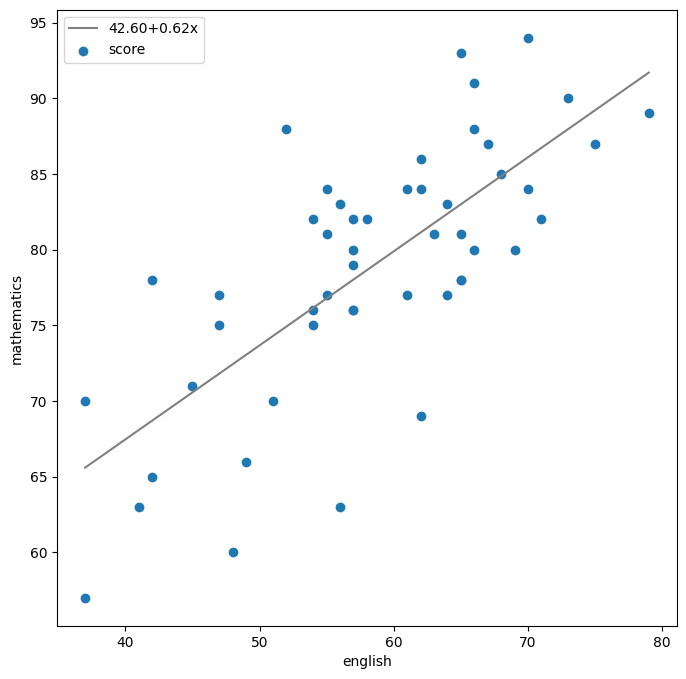

[그림 3-5] 영어·수학 점수의 산점도와 회귀직선


In [22]:
# 계수 β_0, β_1를 구한다
poly_fit = np.polyfit(en_scores, ma_scores, 1)
# β_0 + β_1·x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(en_scores.min(), en_scores.max())
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.plot(xs, ys, color='gray',
        #        poly_fit[1]=β_0,  poly_fit[0]=β_1
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(en_scores, ma_scores, label='score')
# 범례의 표시
ax.legend(loc='upper left')

plt.show()
print('[그림 3-5] 영어·수학 점수의 산점도와 회귀직선')

#### 3) 히트맵

- **히트맵**(heap map)
  - 히스토그램의 2차원 버전

- hist2d()

- 영어 : 35점\~80점, 5점 간격<br>
수학 : 55점\~95점, 5점 간격

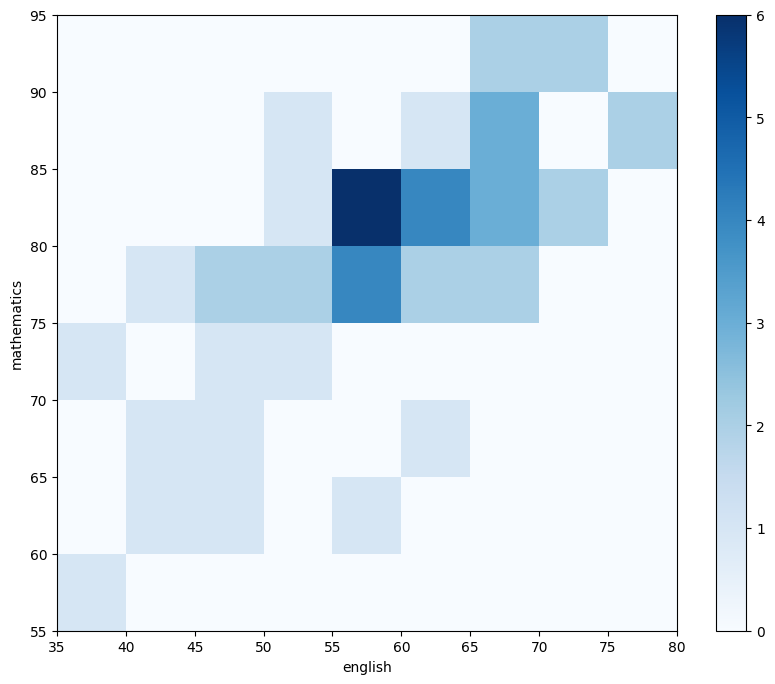

[그림 3-6] 영어·수학 점수의 히트맵


In [23]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(en_scores, ma_scores, cmap='Blues',
              bins=[9, 8], range=[(35, 80), (55, 95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
# 컬러 바의 표시
fig.colorbar(c[3], ax=ax)

plt.show()
print('[그림 3-6] 영어·수학 점수의 히트맵')

- 진한 영역에 많은 학생 분포

### 3-3. 앤스컴의 콰르텟

- 2장과 3장
  - 수치 지표

- 수치만으로는

- **앤스컴의 콰르텟**(Anscombe's Quartet) 데이터

- 11행의 데이터가 4세트
  - url 통해 다운로드

In [24]:
anscombe_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/anscombe.csv")
printobj(anscombe_df.head(), anscombe_df.tail())

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33



 <class 'pandas.core.frame.DataFrame'> 



,dataset,x,y
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91
43,IV,8.0,6.89



 <class 'pandas.core.frame.DataFrame'> 



- 4개의 데이터셋으로

In [25]:
# 'dataset'열의 'I', 'II', 'III', 'IV' 문자열을 이용하여
# 4개의 dataset DataFrame으로 이루어진 list를 만들자.
dataset_idx = anscombe_df['dataset'].unique()  # ['I', 'II', 'III', 'IV']
dataset_list = [anscombe_df[anscombe_df['dataset'] == i] for i in dataset_idx]
printobj(dataset_list[0].head(), dataset_list[3].tail())

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33



 <class 'pandas.core.frame.DataFrame'> 



,dataset,x,y
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91
43,IV,8.0,6.89



 <class 'pandas.core.frame.DataFrame'> 



- 평균, 분산, 상관계수, 회귀직선

In [ ]:
stats_df = pd.DataFrame(index=['X mean', 'X variance',
                               'Y mean', 'Y variance',
                               'X&Y correlation',
                               'X&Y regression line'])
for dataset in dataset_list:
    dataX = dataset['x']
    dataY = dataset['y']
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data {dataset["dataset"].unique()[0]}'] = \
        [f'{np.mean(dataX):.2f}',
         f'{np.var(dataX, ddof=0):.2f}',
         f'{np.mean(dataY):.2f}',
         f'{np.var(dataY, ddof=0):.2f}',
         f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',
         f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']

printobj(stats_df)

,data I,data II,data III,data IV
X mean,9.00,9.00,9.00,9.00
X variance,10.00,10.00,10.00,10.00
Y mean,7.50,7.50,7.50,7.50
Y variance,3.75,3.75,3.75,3.75
X&Y correlation,0.82,0.82,0.82,0.82
X&Y regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x



 <class 'pandas.core.frame.DataFrame'> 



- 지표상 동일 데이터

- 산점도로 확인

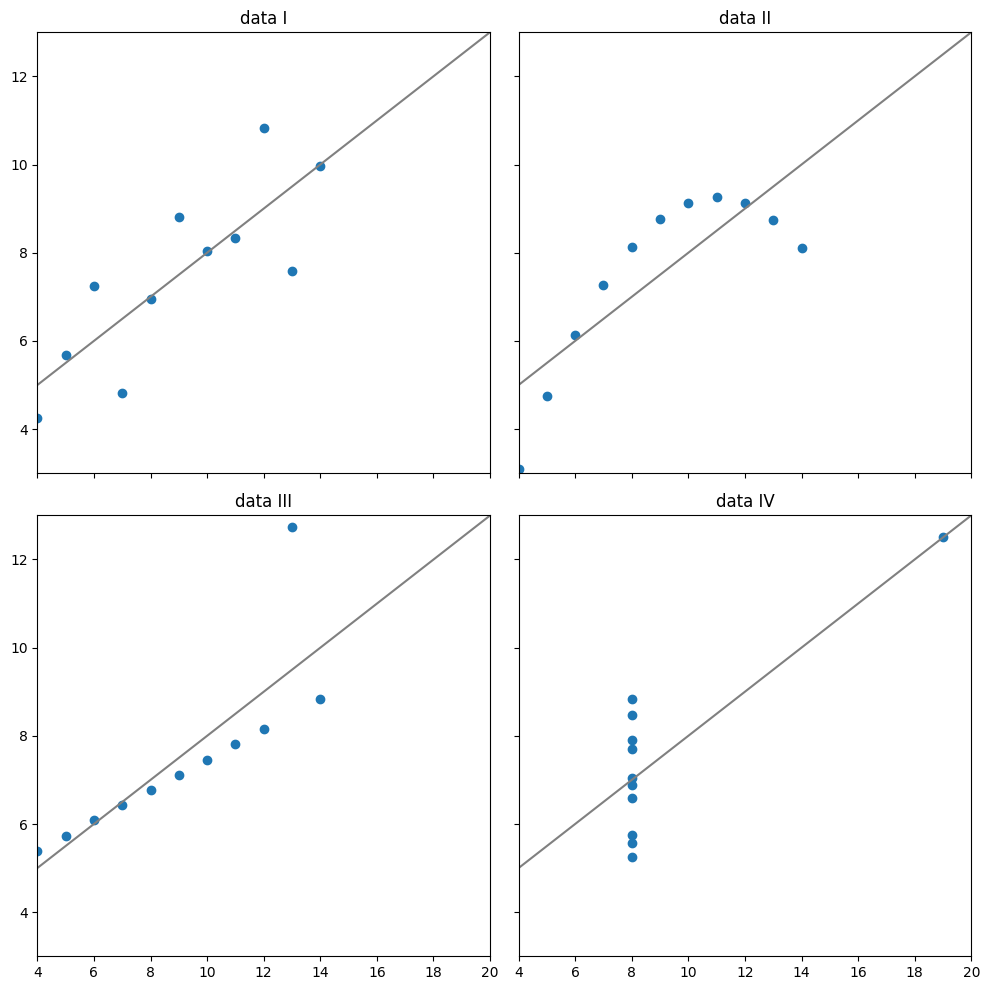

[그림 3-7] 앤스컴의 콰르텟


In [ ]:
# 그래프를 그리기 위한 영역을 2x2개 생성
fig, axes = plt.subplots(nrows=2, ncols=2,
                         figsize=(10, 10),
                         sharex=True, sharey=True)

xs = np.linspace(0, 30, 100)
for i, dataset in enumerate(dataset_list):
    poly_fit = np.polyfit(dataset['x'], dataset['y'], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    # 그리는 영역을 선택
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    # 타이틀을 부여
    ax.set_title(f'data {dataset["dataset"].unique()[0]}')
    ax.scatter(dataset['x'], dataset['y'])
    ax.plot(xs, ys, color='gray')

# 그래프 사이의 간격을 좁힘
plt.tight_layout()
plt.show()
print('[그림 3-7] 앤스컴의 콰르텟')

- 전혀 다른 분포

- 지표 과신하면 안됨

- 시각화의 중요성